In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Numerical_train.csv')

In [3]:
target = data.SalePrice

In [4]:
data = data.drop('SalePrice', axis=1)

In [5]:
scaler = StandardScaler()

In [6]:
data_std = scaler.fit_transform(data)

In [7]:
pca = PCA(n_components=2)

In [8]:
data_pca = pca.fit_transform(data_std)

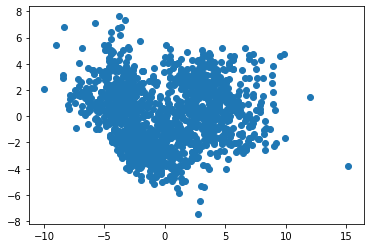

In [9]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])

Now lets color code the points by category and see if we see and interesting pattern

In [10]:
label = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in target]

Now lets color code the points by category and see if we see and interesting pattern

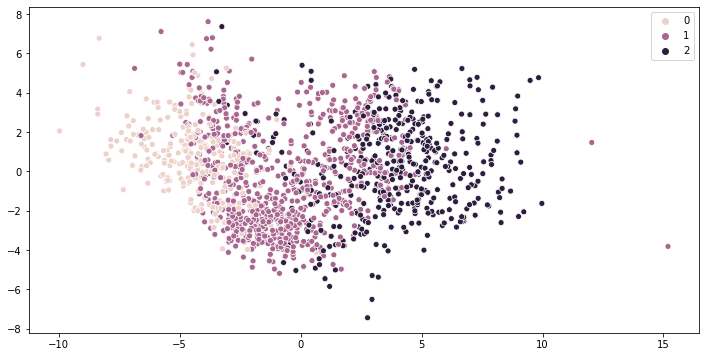

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(data_pca[:, 0], data_pca[:, 1], hue=label)

In [12]:
lda = LinearDiscriminantAnalysis()

In [13]:
data_lda = lda.fit_transform(data_std, label)

/Users/tovaschwartz/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [14]:
lda1 = data_lda[:, 0]

In [15]:
lda2 = data_lda[:, 1]

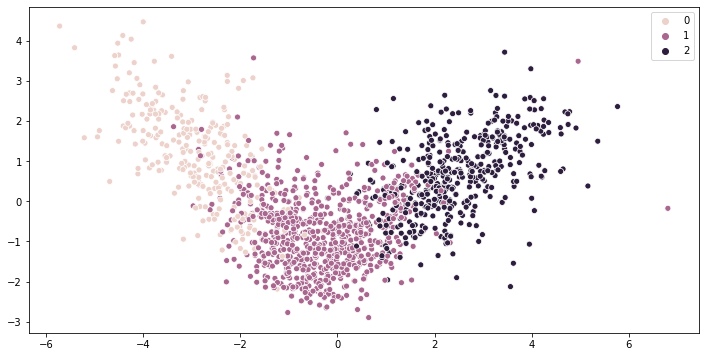

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(lda1, lda2, hue=label)

In [23]:
pca = PCA()

In [24]:
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
variance = pca.explained_variance_

In [29]:
total_va = variance.sum()

In [30]:
cum_var = np.cumsum(variance)/total_va

<BarContainer object of 157 artists>

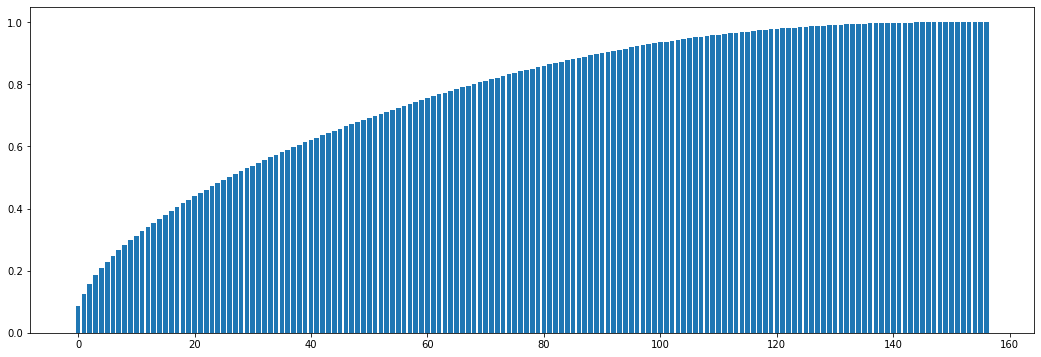

In [34]:
plt.figure(figsize=(18,6))
plt.bar(range(len(cum_var)), cum_var)